#**Sentiment Analysis of Spotify Song Lyrics Using Machine Learning Methods**

##**Overview of Sentiment Analysis**

**Sentiment Analysis:**
Sentiment Analysis is a technique used in Natural Language Processing (NLP) to determine the emotional tone or opinion expressed in a piece of text.

**Use-cases of Sentiment Analysis:**

* **Customer Feedback and Reviews**:
   - Analyzing customer reviews to measure overall satisfaction and identify areas for improvement.
* **Brand Monitoring**:
   - Keeping track of brand reputation by analyzing mentions and discussions on social media and news articles.
* **Financial Market Analysis**:
   - Analyzing news articles and social media posts to predict stock market trends and investor sentiment.

##**Comparing Different Sentiment Analysis Models on Spotify Song Lyrics**

For this research presentation I will be comparing 3 different approaches to analyze the sentiment of 100 Spotify songs.

I will talk about two main techniques:

  1) **VADER**:
  * Older way of approaching SA using a bag of words approach

2) **RoBERTa (HuggingFace):**
  * More advanced transformer model

3) **DistilRoBERTa (HuggingFace):**
  * Distilled version of RoBERTa, the toes are replaced with sentiments

**Strategy:**
* Preprocess data
* Use VADER to analyze the sentiment of the songs
* Use RoBERTa to analyze the sentiment of the songs
* Use DistilRoBERTa to analyze the sentiment of the songs
* Compare results
* Show Use-cases

The dataset I used for comparing different Sentiment Analysis approaches can be found on Kaggle using the following link: https://www.kaggle.com/datasets/imuhammad/audio-features-and-lyrics-of-spotify-songs
* This dataset has approximately 18.000 records and since the OpenAI API key I used is not for free after cleaning the dataset I took a random sample of 100 songs in order to minimize expenses.
* I decided to use song lyrics instead of natural text to see how these models would perform as songs are different and contain metaphors etc.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")

In [ ]:
sns.color_palette()

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
palette = sns.color_palette()

In [ ]:
songs = pd.read_csv('sample_songs_100.csv')

In [ ]:
songs.shape

(100, 4)

In [ ]:
songs.head(10)

,lyrics,playlist_genre,playlist_subgenre,track
0,paints like a picture sings like a melody law ...,pop,electropop,it's you - radio edit by syn cole
1,when darkness falls may it be that we should s...,rock,hard rock,now that we're dead by metallica
2,girlfriend in a coma i know i know - its serio...,rock,permanent wave,girlfriend in a coma - 2011 remaster by the sm...
3,fighting through the crowd and my heart is bea...,pop,indie poptimism,on the back of your neck by cienfue
4,bubblegum ice pop (what else?) pinky ring danc...,hiphop,hip hop,compound by trellion
5,front to the back front to the back front to t...,edm,electro house,unity by dimitri vegas & like mike
6,mmm yeah yuh i thought you into my life (whoa)...,pop,post-teen pop,pete davidson by ariana grande
7,i wanna tease you i wanna please you i wanna s...,r&b,new jack swing,nobody (feat. athena cage) - single version; 2...
8,the music save my soul the beat save my life t...,edm,electro house,save my night - blasterjaxx remix by armin van...
9,im not a stranger its just a strange land its ...,pop,indie poptimism,stranger by mothxr


In [ ]:
songs["lyrics"][2]

'girlfriend in a coma i know i know - its serious girlfriend in a coma i know i know - its really serious there were times when i could have murdered her (but you know i would hate anything to happen to her) no i dont want to see her do you really think shell pull through? do you really think shell pull through? do... girlfriend in a coma i know i know - its serious my my my my my my baby goodbye there were times when i could have strangled her (but you know i would hate anything to happen to her) would you please let me see her! do you really think shell pull through? do you really think shell pull through? do... let me whisper my last goodbyes i know - its serious'

Since the song lyrics still have their punctuation marks I will remove them to prepare the data for the sentiment analysis.

###**Data Preprocessing**

In [ ]:
#Function to remove punctuation marks from a column
import string

def remove_punctuation(df, column):
    translator = str.maketrans('', '', string.punctuation)
    df[column] = df[column].apply(lambda x: x.translate(translator) if isinstance(x, str) else x)
    return df

In [ ]:
songs = remove_punctuation(songs, "lyrics")

In [ ]:
songs["lyrics"][2]

'girlfriend in a coma i know i know  its serious girlfriend in a coma i know i know  its really serious there were times when i could have murdered her but you know i would hate anything to happen to her no i dont want to see her do you really think shell pull through do you really think shell pull through do girlfriend in a coma i know i know  its serious my my my my my my baby goodbye there were times when i could have strangled her but you know i would hate anything to happen to her would you please let me see her do you really think shell pull through do you really think shell pull through do let me whisper my last goodbyes i know  its serious'

In [ ]:
example = songs["lyrics"][2]

In [ ]:
songs.to_csv('sample_songs.csv', index=False)

###**Sentiment Analysis Using VADER**
* VADER (Valence Aware Dictionary and Sentiment Reasoner) works by taking all the words in a sentence one-by-one, assigning three sentiment sores between 0 and 1 for negative, neutral and positive sentiments and then combining all the dominant scores to determine the mood of the sentence whilst removing stopwords from the text such as "and" or "the".
  * One downside of using VADER is that since it uses this bag-of-words approach it does not account for the relationship between words in a sentence, which in natural language is really important. Because of this VADER is not able to determine sarcasm or understand jokes.
  

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores("I feel terrible.")

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [ ]:
example

'girlfriend in a coma i know i know  its serious girlfriend in a coma i know i know  its really serious there were times when i could have murdered her but you know i would hate anything to happen to her no i dont want to see her do you really think shell pull through do you really think shell pull through do girlfriend in a coma i know i know  its serious my my my my my my baby goodbye there were times when i could have strangled her but you know i would hate anything to happen to her would you please let me see her do you really think shell pull through do you really think shell pull through do let me whisper my last goodbyes i know  its serious'

In [ ]:
sia.polarity_scores(example)

{'neg': 0.196, 'neu': 0.782, 'pos': 0.022, 'compound': -0.968}

The compound score here is just the aggrefation of the negative, neutral and positive scores. From -1 to 1 it determines how positive the input text is.

**Running VADER on the entire dataset**

In [ ]:
res = {}
for i, row in tqdm(songs.iterrows(), total=len(songs)):
  text = row["lyrics"]
  id = row["track"]
  res[id] = sia.polarity_scores(text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
res

{"it's you - radio edit by syn cole": {'neg': 0.109,
  'neu': 0.682,
  'pos': 0.209,
  'compound': 0.9451},
 "now that we're dead by metallica": {'neg': 0.167,
  'neu': 0.733,
  'pos': 0.1,
  'compound': -0.9661},
 'girlfriend in a coma - 2011 remaster by the smiths': {'neg': 0.196,
  'neu': 0.782,
  'pos': 0.022,
  'compound': -0.968},
 'on the back of your neck by cienfue': {'neg': 0.062,
  'neu': 0.833,
  'pos': 0.105,
  'compound': 0.8316},
 'compound by trellion': {'neg': 0.129,
  'neu': 0.747,
  'pos': 0.125,
  'compound': 0.3696},
 'unity by dimitri vegas & like mike': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'pete davidson by ariana grande': {'neg': 0.022,
  'neu': 0.409,
  'pos': 0.569,
  'compound': 0.9988},
 'nobody (feat. athena cage) - single version; 2007 remaster by keith sweat': {'neg': 0.086,
  'neu': 0.703,
  'pos': 0.211,
  'compound': 0.9925},
 'save my night - blasterjaxx remix by armin van buuren': {'neg': 0.0,
  'neu': 0.515,
  'pos': 0.485,


In [ ]:
vader = pd.DataFrame(res).T
vader

,neg,neu,pos,compound
it's you - radio edit by syn cole,0.109,0.682,0.209,0.9451
now that we're dead by metallica,0.167,0.733,0.100,-0.9661
girlfriend in a coma - 2011 remaster by the smiths,0.196,0.782,0.022,-0.9680
on the back of your neck by cienfue,0.062,0.833,0.105,0.8316
compound by trellion,0.129,0.747,0.125,0.3696
...,...,...,...,...
superlove (feat. oh wonder) by whethan,0.125,0.630,0.245,0.9962
need you by tinlicker,0.049,0.791,0.160,0.9879
heartbeat by claptone,0.036,0.680,0.283,0.9973
fire in my soul by oliver heldens,0.102,0.800,0.098,-0.2023


In [ ]:
vader.rename(columns={'neg': 'vader_negative'}, inplace=True)
vader.rename(columns={'neu': 'vader_neutral'}, inplace=True)
vader.rename(columns={'pos': 'vader_positive'}, inplace=True)

In [ ]:
songs = pd.merge(songs, vader, left_on="track", right_index=True, how='left')

In [ ]:
songs.head()

,lyrics,playlist_genre,playlist_subgenre,track,vader_negative,vader_neutral,vader_positive,compound
0,paints like a picture sings like a melody law ...,pop,electropop,it's you - radio edit by syn cole,0.109,0.682,0.209,0.9451
1,when darkness falls may it be that we should s...,rock,hard rock,now that we're dead by metallica,0.167,0.733,0.100,-0.9661
2,girlfriend in a coma i know i know its seriou...,rock,permanent wave,girlfriend in a coma - 2011 remaster by the sm...,0.196,0.782,0.022,-0.9680
3,fighting through the crowd and my heart is bea...,pop,indie poptimism,on the back of your neck by cienfue,0.062,0.833,0.105,0.8316
4,bubblegum ice pop what else pinky ring dancing...,hiphop,hip hop,compound by trellion,0.129,0.747,0.125,0.3696


This next function looks at all the sentiment scores and decides which of them is the dominant sentiment based on the highest sentiment score of the 3 options.

In [ ]:
def determine_sentiment_class(row):
    max_score = max(row['vader_negative'], row['vader_neutral'], row['vader_positive'])
    if max_score == row['vader_negative']:
        return 'negative'
    elif max_score == row['vader_neutral']:
        return 'neutral'
    else:
        return 'positive'

songs['vader_dominant_sentiment'] = songs.apply(determine_sentiment_class, axis=1)

In [ ]:
songs.head()

,lyrics,playlist_genre,playlist_subgenre,track,vader_negative,vader_neutral,vader_positive,compound,vader_dominant_sentiment
0,paints like a picture sings like a melody law ...,pop,electropop,it's you - radio edit by syn cole,0.109,0.682,0.209,0.9451,neutral
1,when darkness falls may it be that we should s...,rock,hard rock,now that we're dead by metallica,0.167,0.733,0.100,-0.9661,neutral
2,girlfriend in a coma i know i know its seriou...,rock,permanent wave,girlfriend in a coma - 2011 remaster by the sm...,0.196,0.782,0.022,-0.9680,neutral
3,fighting through the crowd and my heart is bea...,pop,indie poptimism,on the back of your neck by cienfue,0.062,0.833,0.105,0.8316,neutral
4,bubblegum ice pop what else pinky ring dancing...,hiphop,hip hop,compound by trellion,0.129,0.747,0.125,0.3696,neutral


In [ ]:
vader.to_csv("vader.csv", index=False)

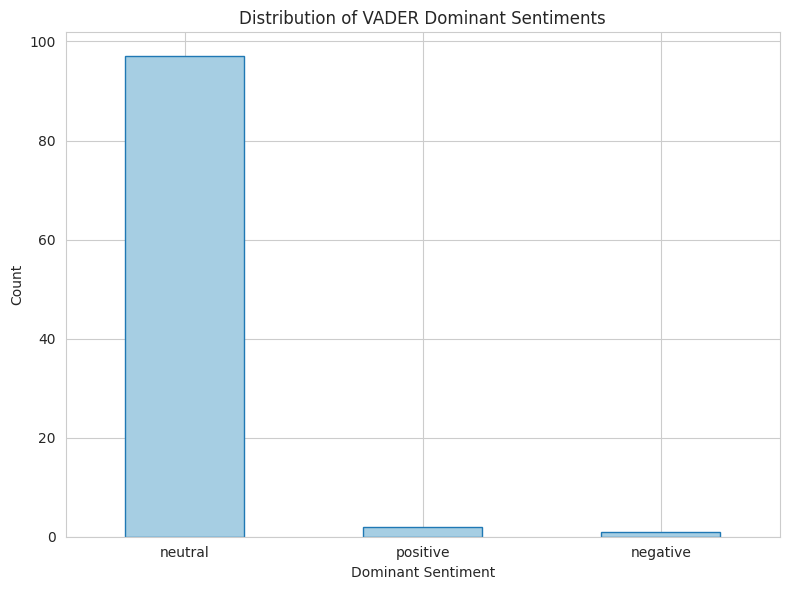

In [ ]:
sentiment_counts = songs['vader_dominant_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=palette[0], edgecolor=palette[1])
plt.title('Distribution of VADER Dominant Sentiments')
plt.xlabel('Dominant Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###**Sentiment Analysis Using RoBERTa**
* RoBERTa is a pre-trained, transformer based Deep Learning model that classifies emotions in english text data. It was trained on Twitter data. It categorizes into (for each sentiment it assigns a score between 0 and 1):
  * negative 😠
  * neutral 😐
  * positive 😊
* Compared to VADER which looked at each word individually, RoBERTa takes into account the relationship between words in a sentence so it is much more effective in pickking up context to determine the mood of the text.
* The model is from HuggingFace: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest


In [ ]:
# !pip install transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax #just smoothes out the scores

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
example

'girlfriend in a coma i know i know  its serious girlfriend in a coma i know i know  its really serious there were times when i could have murdered her but you know i would hate anything to happen to her no i dont want to see her do you really think shell pull through do you really think shell pull through do girlfriend in a coma i know i know  its serious my my my my my my baby goodbye there were times when i could have strangled her but you know i would hate anything to happen to her would you please let me see her do you really think shell pull through do you really think shell pull through do let me whisper my last goodbyes i know  its serious'

VADER scores on the example:

In [ ]:
sia.polarity_scores(example)

{'neg': 0.196, 'neu': 0.782, 'pos': 0.022, 'compound': -0.968}

DistilRoBERTa scores on the example:

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text) #this output is in a form of a tensor
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_negative': scores[0],
    'roberta_neutral': scores[1],
    'roberta_positive': scores[2]
}
scores_dict

{'roberta_negative': 0.84800905,
 'roberta_neutral': 0.130747,
 'roberta_positive': 0.02124397}

**Running RoBERTa on the entire dataset**

The following function will help in classifying the song lyrics into sentiment scores between 0 and 1 and then we can find the dominant sentiment.

In [ ]:
def roberta_sa(lyrics):
    encoded_text = tokenizer(lyrics, truncation=True, padding='max_length', max_length=512, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
      'roberta_negative': scores[0],
      'roberta_neutral': scores[1],
      'roberta_positive': scores[2]
    }
    return scores_dict

In [ ]:
song_lyrics_dict = dict(zip(songs["track"], (songs["lyrics"])))
song_lyrics_dict

{"it's you - radio edit by syn cole": 'paints like a picture sings like a melody law of attraction feels like chemistry yeah its a jungle out in the street you gotta fight for the things you need every direction is lost to fate somewhere they swear it changes i know its you all of the emotion hit me in the moment i know its you every missed connection somehow was a blessing i know its you paints like a picture sings like a melody law of attraction feels like chemistry yeah its a jungle out in the street you gotta fight for the things you need every direction is lost to fate somewhere they swear it changes i know its you all of the emotion hit me in the moment i know its you every missed connection somehow was a blessing i know its you',
 "now that we're dead by metallica": 'when darkness falls may it be that we should see the light when reaper calls may it be that we walk straight and right when doubt returns may it be that faith shall permeate our scars when were seduced then may it b

In [ ]:
res = {}
for song, lyrics in song_lyrics_dict.items():
 res[song] = roberta_sa(lyrics)

In [ ]:
res

{"it's you - radio edit by syn cole": {'roberta_negative': 0.1604066,
  'roberta_neutral': 0.39863774,
  'roberta_positive': 0.44095564},
 "now that we're dead by metallica": {'roberta_negative': 0.040265,
  'roberta_neutral': 0.4720085,
  'roberta_positive': 0.48772657},
 'girlfriend in a coma - 2011 remaster by the smiths': {'roberta_negative': 0.84800905,
  'roberta_neutral': 0.13074702,
  'roberta_positive': 0.021243991},
 'on the back of your neck by cienfue': {'roberta_negative': 0.055477437,
  'roberta_neutral': 0.4453279,
  'roberta_positive': 0.49919474},
 'compound by trellion': {'roberta_negative': 0.1420366,
  'roberta_neutral': 0.4668611,
  'roberta_positive': 0.39110228},
 'unity by dimitri vegas & like mike': {'roberta_negative': 0.025391651,
  'roberta_neutral': 0.75821054,
  'roberta_positive': 0.21639779},
 'pete davidson by ariana grande': {'roberta_negative': 0.015216291,
  'roberta_neutral': 0.1597689,
  'roberta_positive': 0.8250148},
 'nobody (feat. athena cage) 

In [ ]:
roberta_sa = pd.DataFrame.from_dict(res, orient='index')
songs = pd.merge(songs, roberta_sa, left_on="track", right_index=True, how='left')

This next function looks at all the sentiment scores and decides which of them is the dominant sentiment based on the highest sentiment score of the 3 options.

In [ ]:
def determine_sentiment_class(row):
    max_score = max(row['roberta_negative'], row['roberta_neutral'], row['roberta_positive'])
    if max_score == row['roberta_negative']:
        return 'negative'
    elif max_score == row['roberta_neutral']:
        return 'neutral'
    else:
        return 'positive'

songs['roberta_dominant_sentiment'] = songs.apply(determine_sentiment_class, axis=1)

In [ ]:
songs.head()

,lyrics,playlist_genre,playlist_subgenre,track,vader_negative,vader_neutral,vader_positive,compound,vader_dominant_sentiment,roberta_negative,roberta_neutral,roberta_positive,roberta_dominant_sentiment
0,paints like a picture sings like a melody law ...,pop,electropop,it's you - radio edit by syn cole,0.109,0.682,0.209,0.9451,neutral,0.160407,0.398638,0.440956,positive
1,when darkness falls may it be that we should s...,rock,hard rock,now that we're dead by metallica,0.167,0.733,0.100,-0.9661,neutral,0.040265,0.472008,0.487727,positive
2,girlfriend in a coma i know i know its seriou...,rock,permanent wave,girlfriend in a coma - 2011 remaster by the sm...,0.196,0.782,0.022,-0.9680,neutral,0.848009,0.130747,0.021244,negative
3,fighting through the crowd and my heart is bea...,pop,indie poptimism,on the back of your neck by cienfue,0.062,0.833,0.105,0.8316,neutral,0.055477,0.445328,0.499195,positive
4,bubblegum ice pop what else pinky ring dancing...,hiphop,hip hop,compound by trellion,0.129,0.747,0.125,0.3696,neutral,0.142037,0.466861,0.391102,neutral


In [ ]:
songs.to_csv("roberta.csv", index=False)

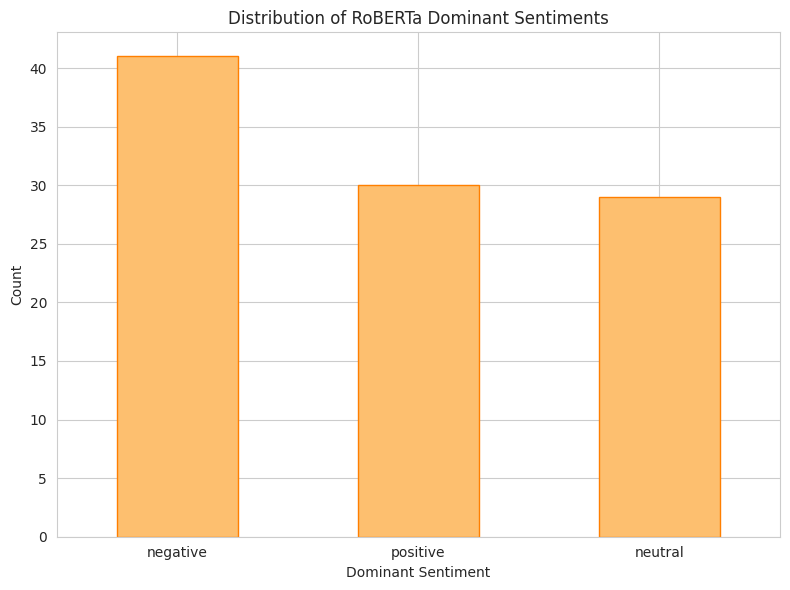

In [ ]:
sentiment_counts = songs['roberta_dominant_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=palette[6], edgecolor=palette[7])
plt.title('Distribution of RoBERTa Dominant Sentiments')
plt.xlabel('Dominant Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###**Sentiment Analysis Using DistilRoBERTa**
* DistilRoBERTa is a pre-trained model that classifies emotions in English text data, trained on 6 diverse dataset that include data from Twitter and Reddit. It categorizes into Ekman's 6 sentiments and a neutral (a more nuanced description):
  * anger 🤬
  * disgust 🤢
  * fear 😨
  * joy 😀
  * neutral 😐
  * sadness 😭
  * surprise 😲
* The model is from HuggingFace: https://huggingface.co/j-hartmann/emotion-english-distilroberta-base

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

VADER scores on the example: `neutral`

RoBERTa scores on the example: `negative`

DistilRoBERTa scores on the example: `sadness`

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text) #this output is in a form of a tensor
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
      "distilroberta_anger": scores[0],
      "distilroberta_disgust": scores[1],
      "distilroberta_fear": scores[2],
      "distilroberta_joy": scores[3],
      "distilroberta_neutral": scores[4],
      "distilroberta_sadness": scores[5],
      "distilroberta_surprise": scores[6]
}
scores_dict

{'distilroberta_anger': 0.025447346,
 'distilroberta_disgust': 0.0015080218,
 'distilroberta_fear': 0.009400647,
 'distilroberta_joy': 0.013166308,
 'distilroberta_neutral': 0.00965435,
 'distilroberta_sadness': 0.8967903,
 'distilroberta_surprise': 0.044032983}

The following function will help in classifying the song lyrics into sentiment scores between 0 and 1 and then we can find the dominant sentiment.

In [ ]:
def distilroberta_sa(lyrics):
    encoded_text = tokenizer(lyrics, truncation=True, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
      "distilroberta_anger": scores[0],
      "distilroberta_disgust": scores[1],
      "distilroberta_fear": scores[2],
      "distilroberta_joy": scores[3],
      "distilroberta_neutral": scores[4],
      "distilroberta_sadness": scores[5],
      "distilroberta_surprise": scores[6]
}
    return scores_dict

In [ ]:
res = {}
for song, lyrics in song_lyrics_dict.items():
 res[song] = distilroberta_sa(lyrics)

In [ ]:
res

{"it's you - radio edit by syn cole": {'distilroberta_anger': 0.05343483,
  'distilroberta_disgust': 0.0047851037,
  'distilroberta_fear': 0.022082843,
  'distilroberta_joy': 0.09924802,
  'distilroberta_neutral': 0.19294554,
  'distilroberta_sadness': 0.46748322,
  'distilroberta_surprise': 0.16002046},
 "now that we're dead by metallica": {'distilroberta_anger': 0.018578816,
  'distilroberta_disgust': 0.0024482342,
  'distilroberta_fear': 0.01442793,
  'distilroberta_joy': 0.012157561,
  'distilroberta_neutral': 0.017127164,
  'distilroberta_sadness': 0.93191355,
  'distilroberta_surprise': 0.0033467223},
 'girlfriend in a coma - 2011 remaster by the smiths': {'distilroberta_anger': 0.025447346,
  'distilroberta_disgust': 0.0015080218,
  'distilroberta_fear': 0.009400647,
  'distilroberta_joy': 0.013166308,
  'distilroberta_neutral': 0.00965435,
  'distilroberta_sadness': 0.8967903,
  'distilroberta_surprise': 0.044032983},
 'on the back of your neck by cienfue': {'distilroberta_ange

In [ ]:
distilroberta_sa = pd.DataFrame.from_dict(res, orient='index')
songs = pd.merge(songs, distilroberta_sa, left_on="track", right_index=True, how='left')

This next function looks at all the sentiment scores and decides which of them is the dominant sentiment based on the highest sentiment score of the 7 options.

In [ ]:
def determine_sentiment_class(row):
    max_score = max(row['distilroberta_anger'], row['distilroberta_disgust'], row['distilroberta_fear'],
                    row['distilroberta_joy'], row['distilroberta_neutral'], row['distilroberta_sadness'],
                    row['distilroberta_surprise'])
    if max_score == row['distilroberta_anger']:
        return 'anger'
    elif max_score == row['distilroberta_disgust']:
        return 'disgust'
    elif max_score == row['distilroberta_fear']:
        return 'fear'
    elif max_score == row['distilroberta_joy']:
        return 'joy'
    elif max_score == row['distilroberta_neutral']:
        return 'neutral'
    elif max_score == row['distilroberta_sadness']:
        return 'sadness'
    else:
        return 'surprise'

songs['distilroberta_dominant_sentiment'] = songs.apply(determine_sentiment_class, axis=1)

* **Keep in mind that for a machine learning task such as classification or clustering using the sentiment scores is more optimal than relying on the dominant sentiment since it carries more information.**

In [ ]:
songs.head()

,lyrics,playlist_genre,playlist_subgenre,track,vader_negative,vader_neutral,vader_positive,compound,vader_dominant_sentiment,roberta_negative,...,roberta_positive,roberta_dominant_sentiment,distilroberta_anger,distilroberta_disgust,distilroberta_fear,distilroberta_joy,distilroberta_neutral,distilroberta_sadness,distilroberta_surprise,distilroberta_dominant_sentiment
0,paints like a picture sings like a melody law ...,pop,electropop,it's you - radio edit by syn cole,0.109,0.682,0.209,0.9451,neutral,0.160407,...,0.440956,positive,0.053435,0.004785,0.022083,0.099248,0.192946,0.467483,0.160020,sadness
1,when darkness falls may it be that we should s...,rock,hard rock,now that we're dead by metallica,0.167,0.733,0.100,-0.9661,neutral,0.040265,...,0.487727,positive,0.018579,0.002448,0.014428,0.012158,0.017127,0.931914,0.003347,sadness
2,girlfriend in a coma i know i know its seriou...,rock,permanent wave,girlfriend in a coma - 2011 remaster by the sm...,0.196,0.782,0.022,-0.9680,neutral,0.848009,...,0.021244,negative,0.025447,0.001508,0.009401,0.013166,0.009654,0.896790,0.044033,sadness
3,fighting through the crowd and my heart is bea...,pop,indie poptimism,on the back of your neck by cienfue,0.062,0.833,0.105,0.8316,neutral,0.055477,...,0.499195,positive,0.629550,0.003689,0.301132,0.011853,0.014148,0.030697,0.008930,anger
4,bubblegum ice pop what else pinky ring dancing...,hiphop,hip hop,compound by trellion,0.129,0.747,0.125,0.3696,neutral,0.142037,...,0.391102,neutral,0.257144,0.003104,0.328622,0.043907,0.075218,0.192796,0.099208,fear


In [ ]:
songs.to_csv("distilroberta.csv", index=False)

In [ ]:
songs.to_csv("all_3_sentiment_models.csv", index=False)

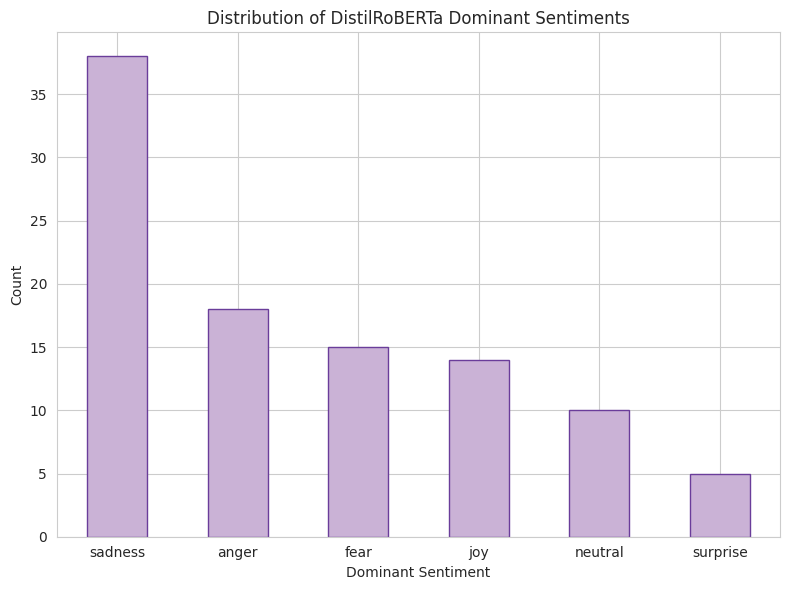

In [ ]:
sentiment_counts = songs['distilroberta_dominant_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=palette[8], edgecolor=palette[9])
plt.title('Distribution of DistilRoBERTa Dominant Sentiments')
plt.xlabel('Dominant Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

No songs were classified to have 'disgust' as their dominant sentiment, which is not surprising considering that in natural language processing disgust is the hardest sentiment to detect.

##**Comparing Results Between Models**

###**Comparison Matrix of VADER and RoBERTa Results**

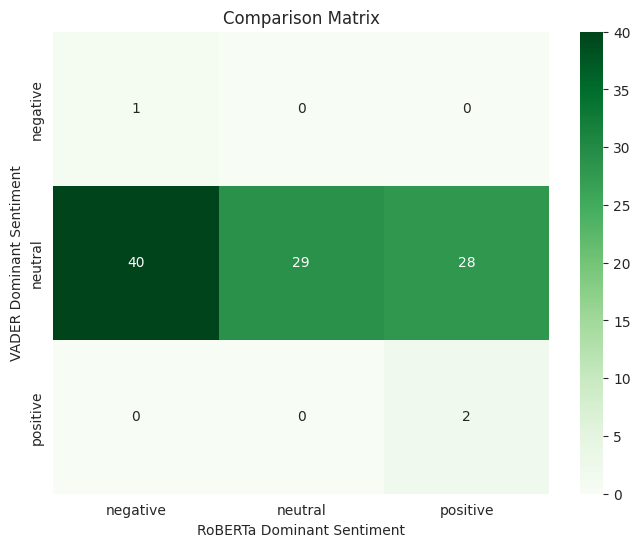

In [ ]:
class_names = ['negative', 'neutral', 'positive']

vader_predictions = songs["vader_dominant_sentiment"]
roberta_predictions = songs["roberta_dominant_sentiment"]

comparison_matrix = np.zeros((3, 3), dtype=int)

class_to_index = {class_name: index for index, class_name in enumerate(class_names)}

for v, r in zip(vader_predictions, roberta_predictions):
    index_v = class_to_index[v]
    index_r = class_to_index[r]
    comparison_matrix[index_v, index_r] += 1

comparison_df = pd.DataFrame(comparison_matrix, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(comparison_df, annot=True, fmt='d', cmap='Greens')
plt.xlabel('RoBERTa Dominant Sentiment')
plt.ylabel('VADER Dominant Sentiment')
plt.title('Comparison Matrix')
plt.show()

##**How I Used Sentiment Analysis**
* **Does Sentiment Analysis help with classifying the genre of songs?**

###**Problem Statement: Could we predict the genre of a song based on the sentiments of the lyrics?**

In [ ]:
songs.columns

Index(['lyrics', 'playlist_genre', 'playlist_subgenre', 'track',
       'vader_negative', 'vader_neutral', 'vader_positive', 'compound',
       'vader_dominant_sentiment', 'roberta_negative', 'roberta_neutral',
       'roberta_positive', 'roberta_dominant_sentiment', 'distilroberta_anger',
       'distilroberta_disgust', 'distilroberta_fear', 'distilroberta_joy',
       'distilroberta_neutral', 'distilroberta_sadness',
       'distilroberta_surprise', 'distilroberta_dominant_sentiment'],
      dtype='object')

**VADER:**

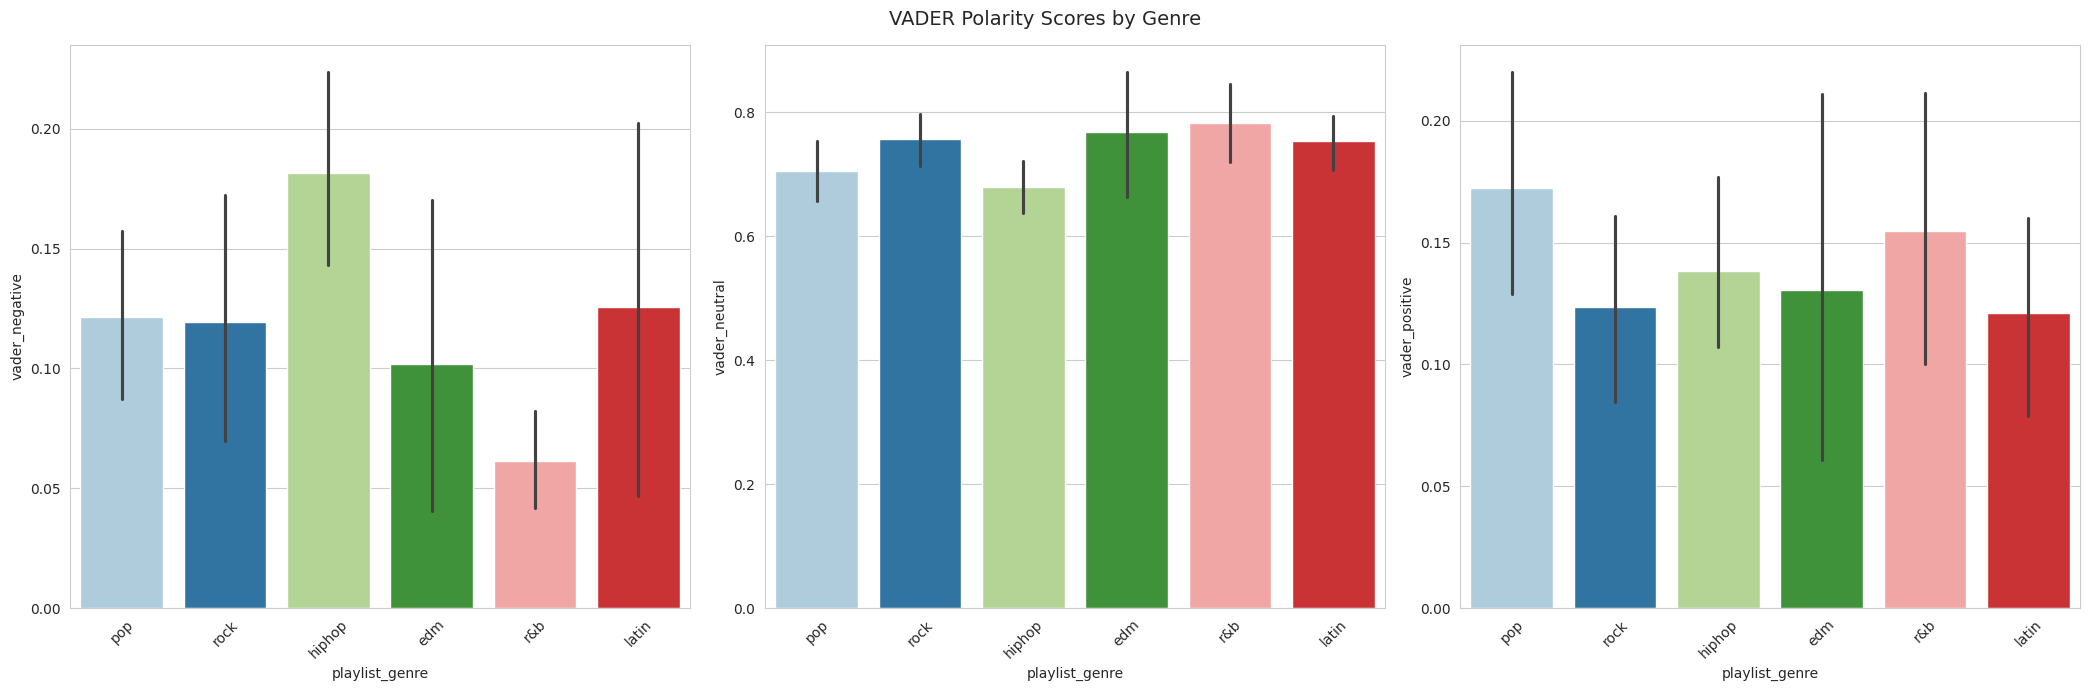

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
sns.barplot(data=songs, x='playlist_genre', y='vader_negative', ax=axes[0], hue='playlist_genre', palette='Paired')
sns.barplot(data=songs, x='playlist_genre', y='vader_neutral', ax=axes[1], hue='playlist_genre', palette='Paired')
sns.barplot(data=songs, x='playlist_genre', y='vader_positive', ax=axes[2], hue='playlist_genre', palette='Paired')
fig.suptitle("VADER Polarity Scores by Genre", fontsize=14)
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout();

**RoBERTa:**

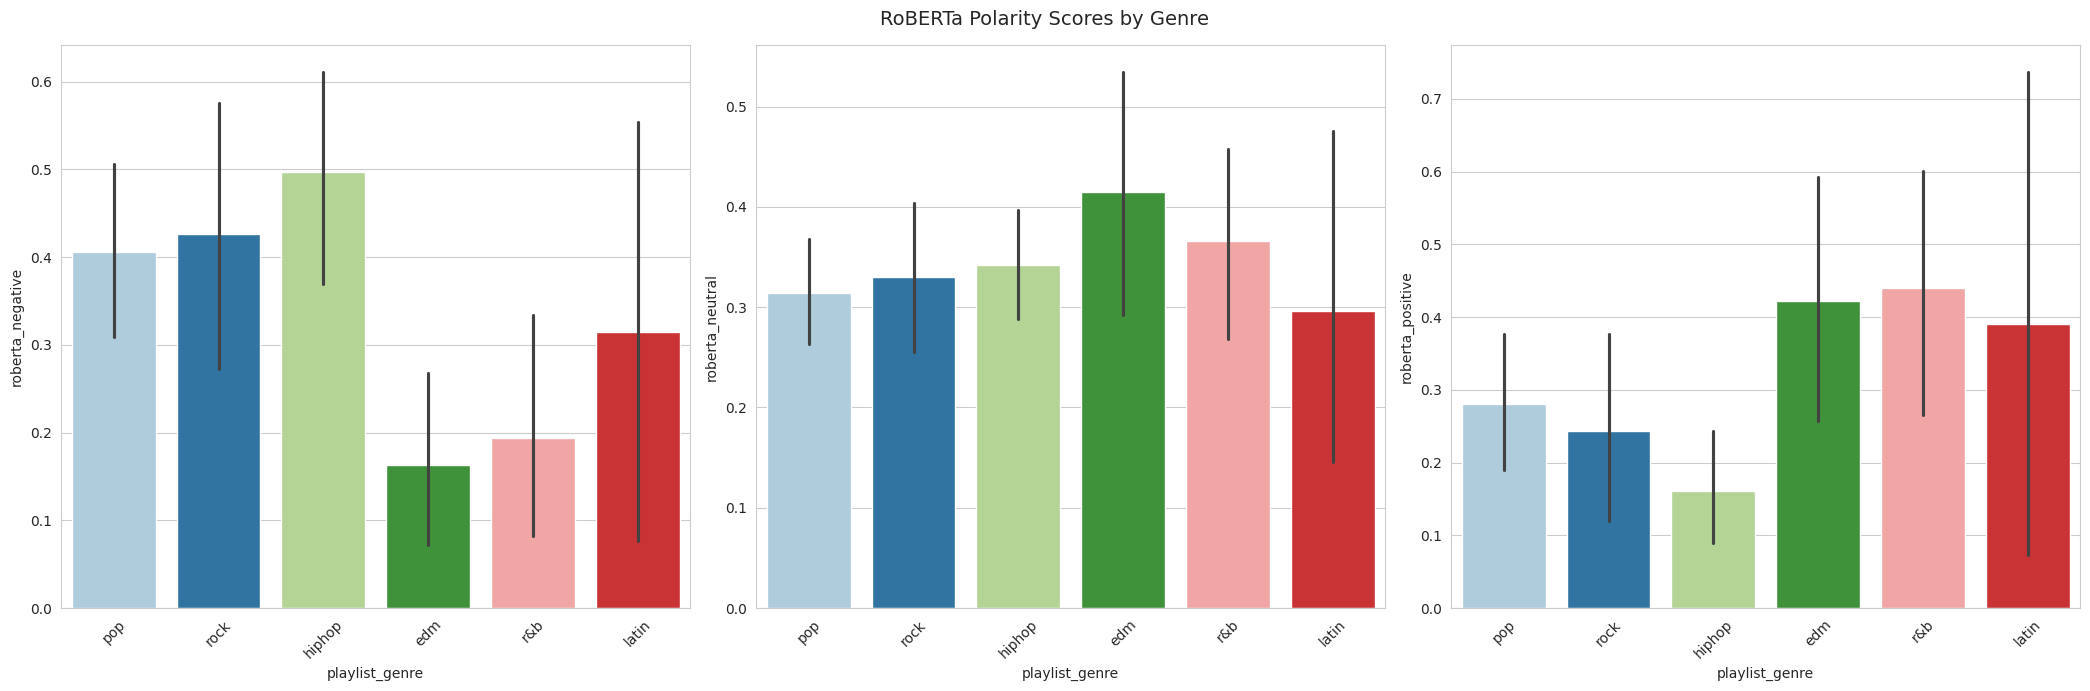

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
sns.barplot(data=songs, x='playlist_genre', y='roberta_negative', ax=axes[0], hue='playlist_genre', palette='Paired')
sns.barplot(data=songs, x='playlist_genre', y='roberta_neutral', ax=axes[1], hue='playlist_genre', palette='Paired')
sns.barplot(data=songs, x='playlist_genre', y='roberta_positive', ax=axes[2], hue='playlist_genre', palette='Paired')
fig.suptitle("RoBERTa Polarity Scores by Genre", fontsize=14)
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout();

**DistilRoBERTa:**

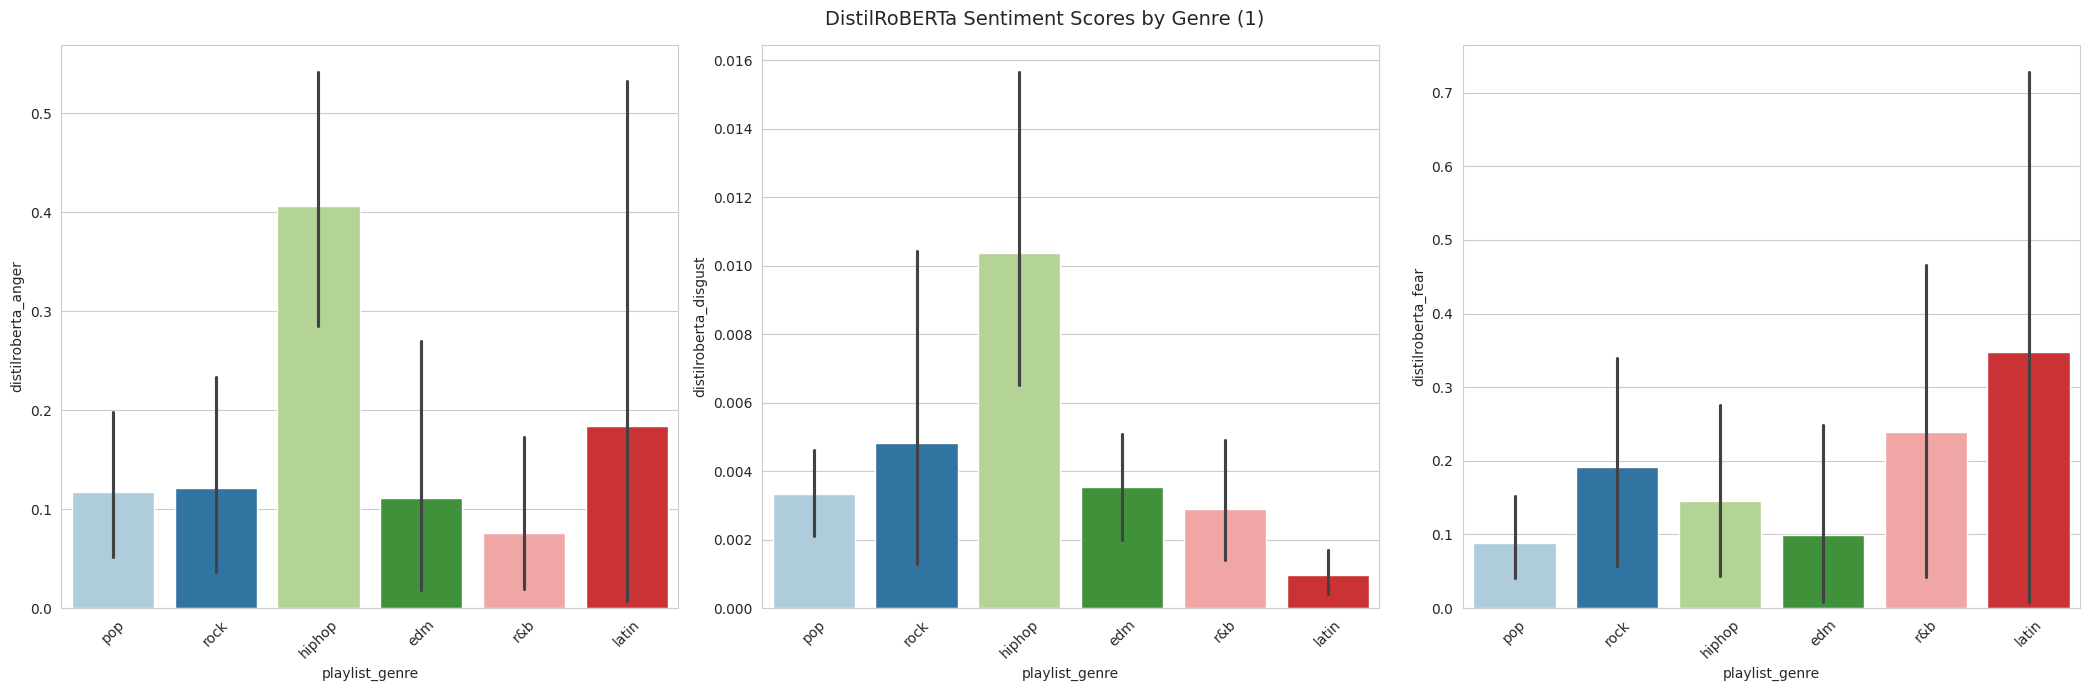

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_anger', ax=axes[0], hue='playlist_genre', palette='Paired')
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_disgust', ax=axes[1], hue='playlist_genre', palette='Paired')
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_fear', ax=axes[2], hue='playlist_genre', palette='Paired')
fig.suptitle("DistilRoBERTa Sentiment Scores by Genre (1)", fontsize=14)
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout();

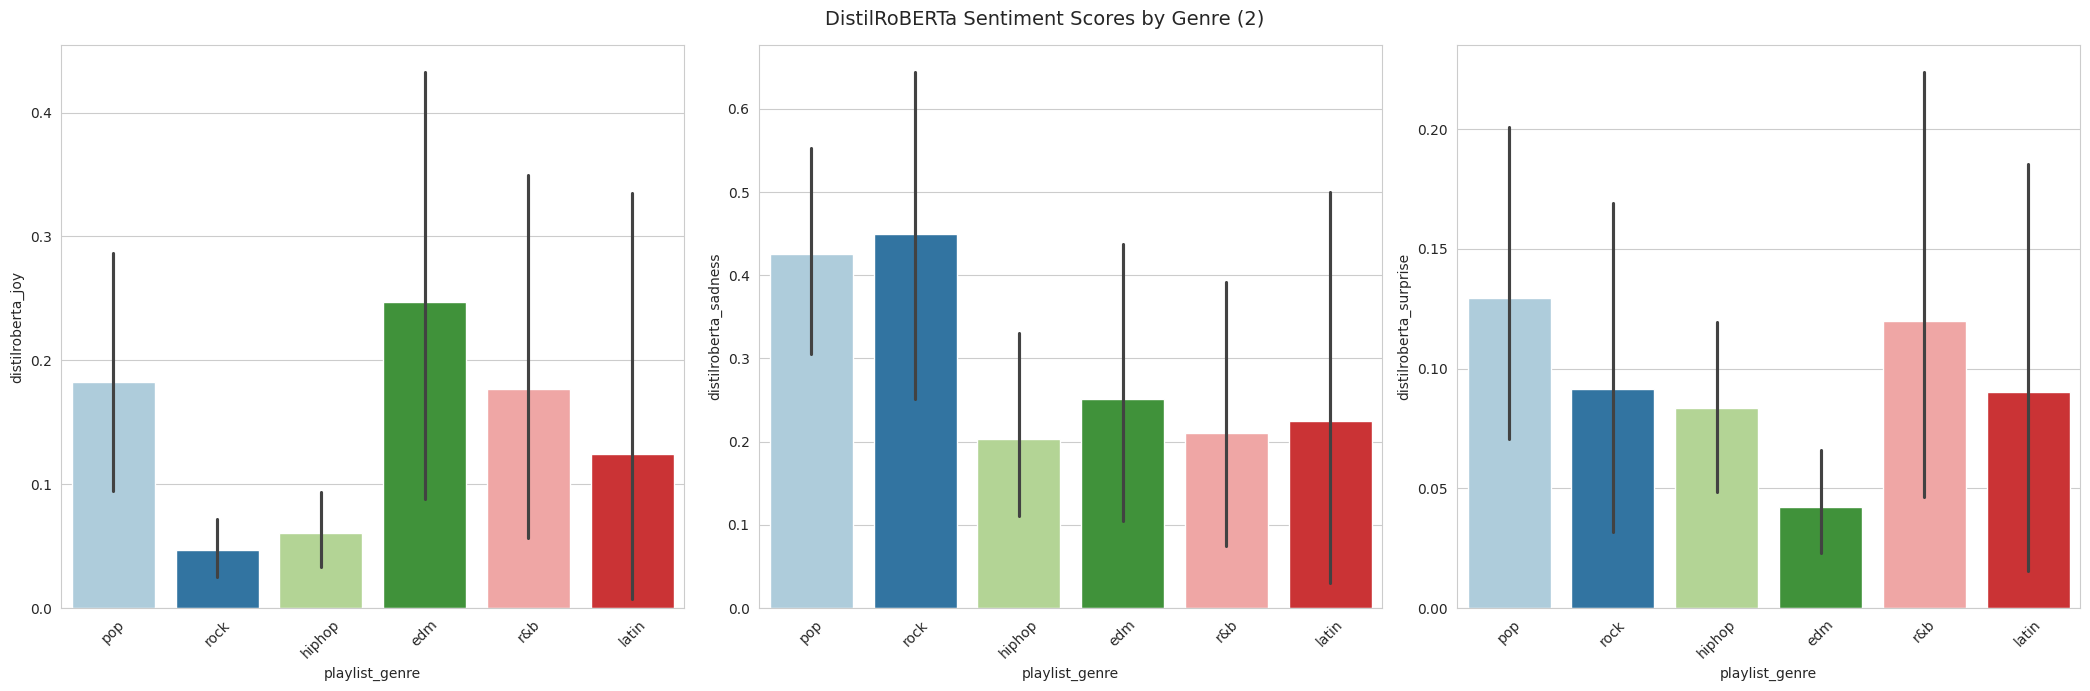

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_joy', ax=axes[0], hue='playlist_genre', palette='Paired')
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_sadness', ax=axes[1], hue='playlist_genre', palette='Paired')
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_surprise', ax=axes[2], hue='playlist_genre', palette='Paired')
fig.suptitle("DistilRoBERTa Sentiment Scores by Genre (2)", fontsize=14)
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout();

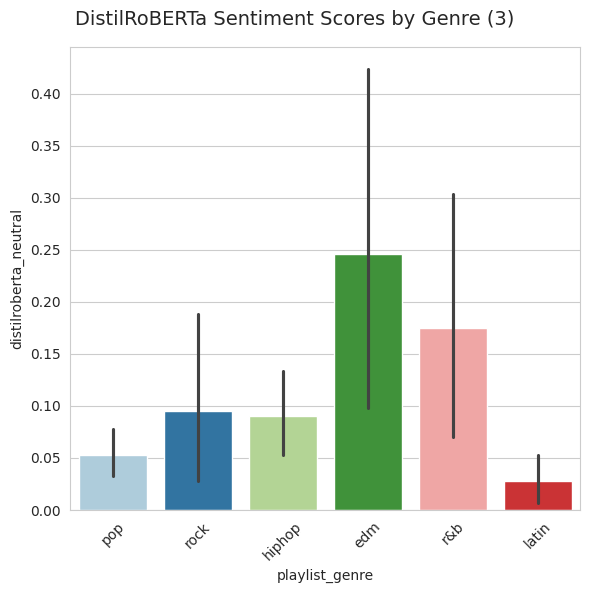

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_neutral', ax=ax, hue='playlist_genre', palette='Paired')
fig.suptitle("DistilRoBERTa Sentiment Scores by Genre (3)", fontsize=14)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout();

* **Keep in mind that since we ran these models on song lyrics and songs might have multiple dominant sentiments these results might be inaccurate.**

From here on the possibilities are endless, we could use this new data to include in a classification or clustering for example to find out other insights from the other features of the dataset.

###**Other Use-cases**
* Introducing new information for:
  * Classifying Speech Distortions
  * Clustering Movie data